- 텐서 : 다차원 배열
- array | 1차원 배열 : 벡터, 2차원 배열 : 행렬, 3차원 이상 배열 : 텐서
- 텐서(tensor) 안에 1, 2차원 백터도 포함됨. 텐서가 더 큰 개념임
- 딥러닝에서 텐서는 넘파이로 다룸

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
print(train_images.ndim)

print(train_images.shape)
## 60000개의 사진(장 수), 28*28은 한 장에 대한 height, width(, color여부)

print(train_images.dtype)  
## u : unsigned(+/- 부호가 없음), int : 정수, 8 : 8비트
## 8bit = 1 Byte
## 2**8 = 256
## 256가지의 서로 다른 경우의 수를 표현할 수 있음(부호가 없으므로 0 ~ 255 사이의 수)

3
(60000, 28, 28)
uint8


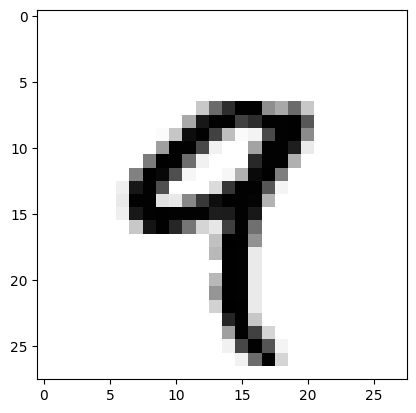

9


In [10]:
### 이미지 출력하기
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(train_labels[4])

In [16]:
## 100장 씩 묶어서 뽑기(0~100, 100~200)
slice_1 = train_images[:100]
slice_2 = train_images[100:200]

print(len(slice_1))
print(len(slice_2))

100
100


In [18]:
len(train_images)/100

600.0

In [47]:
slice_ = {}

for n in range(int(len(train_images)/100)):
    slice_[n] = train_images[100*n : 100*(n+1)]

slice_[1]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [31]:
n = 100
for i in range(1,11):
    globals()[f'slice_{i}'] = train_images[n-100:n]
    n += 100 

In [48]:
for i in range(1,11):
    locals()[f'slice_{i}'] = train_images[100*n : 100*(n+1)]
    n += 100 

# 영화 리뷰 분류 : 이진 분류 문제

In [49]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
## num_words = 10000 : 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
## 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있음

17464789/17464789 [==============================] - 0s 0us/step


In [50]:
train_data.shape

(25000,)

In [55]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [57]:
len(train_data[0])
## 218개의 문자로 이루어짐

218

In [58]:
### 리뷰를 다시 텍스트로 디코딩하기
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매칭한 딕셔너리

reverse_word_index = dict(                          ## 정수 인덱스와 단어를 매핑하도록 뒤집기
                    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
                    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [83]:
### 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
        return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [84]:
x_train.shape

(25000, 10000)

In [85]:
### 모델 정의하기
from keras import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [86]:
### compile
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [87]:
## 검증 세트 준비하기
x_val = x_train[:15000]
partial_x_train = x_train[15000:]

y_val = y_train[:15000]
partial_y_train = y_train[15000:]

In [88]:
## 모델 훈련하기
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
20/20 [==============================] - 2s 55ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 2/20
20/20 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 3/20
20/20 [==============================] - 1s 28ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 4/20
20/20 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 5/20
20/20 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 6/20
20/20 [==============================] - 0s 25ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 7/20
20/20 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 8/20
20

In [89]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [90]:
history_dict

{'loss': [0.6931511163711548,
  0.693137526512146,
  0.693140983581543,
  0.6931366920471191,
  0.6931357383728027,
  0.6931352615356445,
  0.6931337714195251,
  0.6931338310241699,
  0.6931357979774475,
  0.6931312084197998,
  0.693138599395752,
  0.693134069442749,
  0.6931370496749878,
  0.6931356191635132,
  0.6931342482566833,
  0.6931363940238953,
  0.6931334137916565,
  0.693133533000946,
  0.6931396722793579,
  0.6931359767913818],
 'accuracy': [0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895,
  0.5033000111579895],
 'val_loss': [0.6931629180908203,
  0.6931725740432739,
  0.6931769251823425,
  0.6931776404380798,
  0

- accuracy : 같은 train 데이터로 계속 학습하므로 acccuracy는 계속 높아질 수 밖에 없음
- val_acc : train을 반복할 때마다 train set와 비슷한 데이터를 통해 예측률 파악

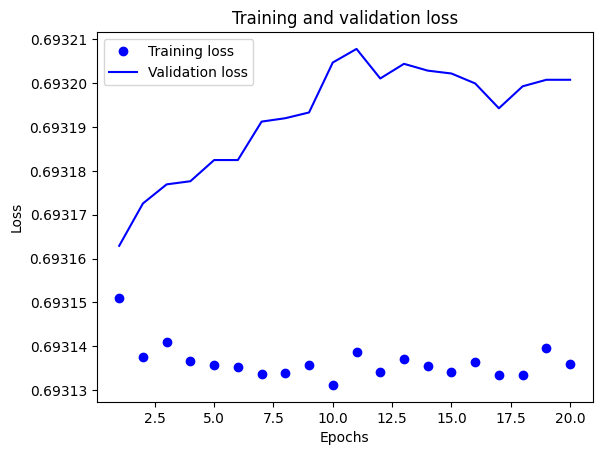

In [91]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

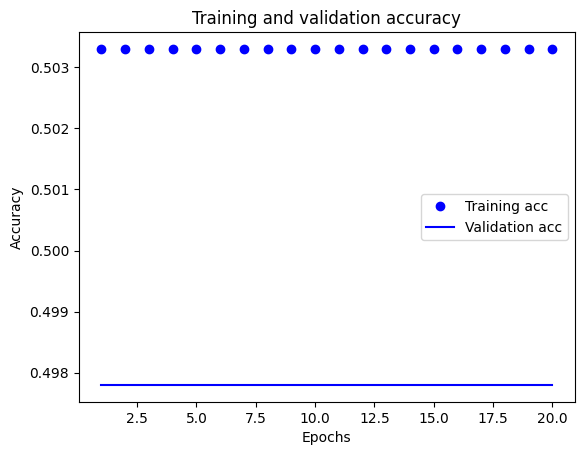

In [92]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

In [93]:
## 모델을 처음부터 다시 훈련하기
model = Sequential()

model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4961
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 4/4
782/782 [==============================] - 10s 2ms/step - loss: 0.6932 - accuracy: 0.5000


In [94]:
results

[0.6931552886962891, 0.4999600052833557]

In [97]:
preds = model.predict(x_test)
preds

782/782 [==============================] - 1s 2ms/step


array([[0.58645797],
       [0.4995112 ],
       [0.4995112 ],
       ...,
       [0.4995112 ],
       [0.4995112 ],
       [0.4995112 ]], dtype=float32)

In [98]:
preds[:4]

array([[0.58645797],
       [0.4995112 ],
       [0.4995112 ],
       [0.4995112 ]], dtype=float32)